<h1><center> Data Collection - Spotify Albums</center></h1>

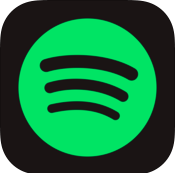

### Install SpoitPY
> SpotiPY is a Wrapper for the spotify web API that uses python in order to scrape from the Spotify web API

### SpotiPY allows me to scrape features like:
- Albums
- Tracks 
- Audio Analysis
- Audio Features
- Artist Info
- User Info

From my RIAA data frame , I use the artist name for collecting their individual Artist ID's & from there I can collect All of their album names. I want to collect all albums so that I can analyze each track in the album and compare the songs that won awards to the ones that did not. I thought by collecting other songs from the same artist will emphasize the content in the musical featuers that contribute to a songs success. 

In [1]:
import sys
import spotipy
import spotipy.util as util
import pandas as pd
import numpy as np
import time
from bs4 import BeautifulSoup as bs

In [127]:
df = pd.read_csv('../00_Data/df_riaa.csv')

### Client Authorization Token

 - SpotiPY provided me with the code directly below in order to connect my notebook with the spotify web API and to present my authorization token

In [5]:
scope = 'user-library-read'

if len(sys.argv) > 1:
    username = sys.argv[1]
else:
    print ("Usage: %s username" % (sys.argv[0],))
    sys.exit()

token = util.prompt_for_user_token(username,scope,client_id='XXXXXX',
                                   client_secret='XXXXXXX',redirect_uri='http://localhost/')


In [4]:
sp = spotipy.Spotify(auth=token)

### Functions to get Artist info then all Artist albums

In [7]:
def get_artist(name):
    results = sp.search(q='artist:' + name, type='artist')
    items = results['artists']['items']
    if len(items) > 0:
        return items[0]
    else:
        return None

In [318]:
def get_artist_albums(artist):
    albums = []
    results = sp.artist_albums(artist['id'], album_type='album', limit = 8)
    albums.extend(results['items'])
    while results['next']:
        results = sp.next(results)
        albums.extend(results['items'])
    seen = set()
    albums.sort(key=lambda album:album['name'].lower())
    for album in albums:
        name = album['name']
        if name not in seen:
            seen.add(name)
    return seen

- Grabbing my unique artist that won awards

In [9]:
unique_artist = df.artist.unique()

In [339]:
albums_list = []

- Putting each unique artist through my functions to output every album from each artist

In [335]:
for i in unique_artist:
    try:
        albums_list.append(get_artist_albums(get_artist(i)))
    except TypeError:
        pass

In [337]:
albums = pd.DataFrame(albums_list)

In [358]:
albums.drop_duplicates(inplace = True)

In [410]:
albums.fillna(value = 'None', inplace = True)

 - Each row in my data frame was a list of the Artist albums, so below , I am looping through each row and appending all albums from all artist into one list. 

In [435]:
alb = []
num = 0
for i in range(1061):
    for i in albums.values[num]:
        if i != 'None':
            alb.append(i)
    num += 1

In [439]:
album_list = pd.DataFrame(alb)

### Data frame to Csv for use in next notebook to scrape tracks of each album

In [441]:
album_list.to_csv('../00_Data/albums_spot_list.csv', index = False)